In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [141]:
# Open file
f = open("log_encoding.txt", "r")

# Create lists for data
kb1 = []
kb10 = []
mb1 = []
mb10 = []

# Split file into lists
for x in f:
    number = float(x.split(',')[-1].strip('\n'))
    if x.startswith("10240,"):
        kb1.append(number)
    elif x.startswith("102400,"):
        kb10.append(number)
    elif x.startswith("1048576,"):
        mb1.append(number)
    elif x.startswith("10485760,"):
        mb10.append(number)

# Close file
f.close()

# Create np arrays
kb1np = np.array(kb1)
kb10np = np.array(kb10)
mb1np = np.array(mb1)
mb10np = np.array(mb10)

In [142]:
# Get data in ms
x = kb10np*1000

In [143]:
# Get 5% and 9% percentiles
q5, q95 = np.percentile(x, [5, 95])

# Remove outliers outside percentiles
x_clipped = x[(x < q95) & (x > q5)]

# Get average and median
avg = np.average(x_clipped)
median = np.median(x_clipped)

In [144]:
# Something i found online to determine number of bins to use in histogram
# I don't use it, since the result doesn't make sense to use
q25, q75 = np.percentile(x_clipped, [25, 75])
bin_width = 2 * (q75 - q25) * len(x_clipped) ** (-1/3)
bins = round((x_clipped.max() - x_clipped.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

Freedman–Diaconis number of bins: 6


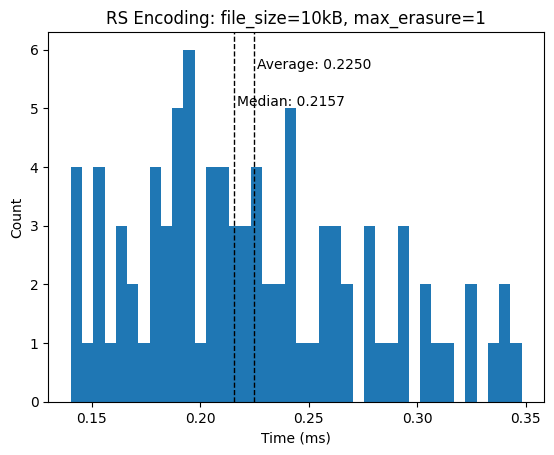

In [145]:
# Create histogram
plt.hist(x_clipped, density=False, bins=40)  # density=False would make counts

# Create lines for average and median
min_ylim, max_ylim = plt.ylim()
plt.axvline(avg, color='k', linestyle='dashed', linewidth=1)
plt.text(avg*1.005, max_ylim*0.9, 'Average: {:.4f}'.format(avg))
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.text(median*1.005, max_ylim*0.8, 'Median: {:.4f}'.format(median))

# Insert labels etc.
plt.ylabel('Count')
plt.xlabel('Time (ms)');
plt.title("RS Encoding: file_size=10kB, max_erasure=1")

plt.show()